In [1]:
#Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

<div class="alert alert-block alert-warning"><b>Point 0, 1, 2 and 3:</b> In following steps we are going to apply several tehcniques, methods or procedures to check and assess the training dataset. Furthermore, in these stages we are not going to modify or edit the training dataset.</div>

# __0. Important__

Type of machine learning system to build:

1. Supervised Learning
2. Batch Learning (also called "offline learning")
3. Model-based learning

# __1. Loading the Data - Training Dataset__

In [2]:
training_data = pd.read_csv("/kaggle/input/titanic/train.csv")

# __2. Exploratory Data Analysis (EDA) - Training Dataset__


  Shape of the dataframe:  (891, 12) 

  Head of the dataframe:  

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C12

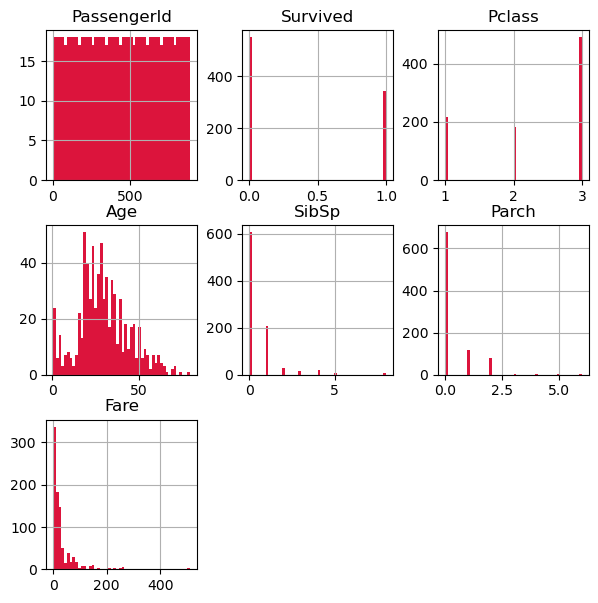


  Boxplots for the numerical columns: 



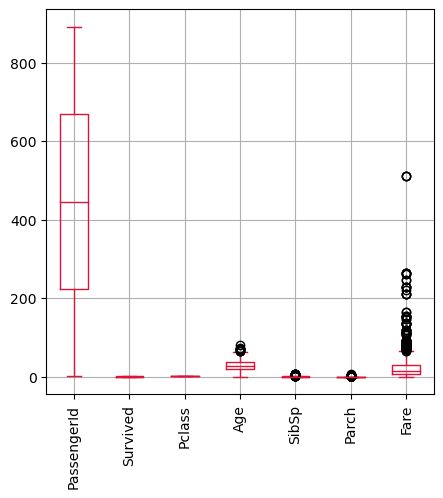


  Standard Correlation Coefficient of the numerical columns: 

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  

  Correlation matrix for the numerical columns: 



/tmp/ipykernel_33/65403425.py:35: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(training_data.corr())
/tmp/ipykernel_33/65403425.py:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = training_data.corr()


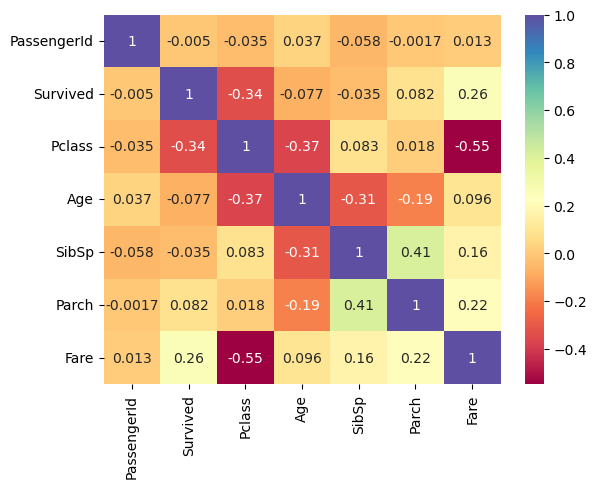

In [25]:
def EDA(training_data):  
  # Print the "shape" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Shape of the dataframe:",'\033[0m', training_data.shape, "\n")
    
  # Print the "head" of the dataframe
  print('\033[1m','\033[94m',"Head of the dataframe:",'\033[0m', "\n")
  print(training_data.head())
  
  # Print the "general information" of the dataframe
  print("\n", '\033[1m','\033[94m',"Information of the dataframe:",'\033[0m', "\n")
  training_data.info()
 
  # Print the "number and percentage" of missing values per column" of the dataframe
  print("\n" +'\033[1m','\033[94m', "Number and percentage of missing values per column:", '\033[0m' + "\n")
  missing = training_data.isnull().sum()
  percent = missing / training_data.shape[0] * 100
  print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))

  # Print the "summary statistics of the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m', "Summary statistics of the numerical columns:", '\033[0m' + "\n")
  print(training_data.describe())  
    
  # Plot "histograms for the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Histograms for the numerical columns:", '\033[0m' + "\n")
  training_data.hist(bins= 50, figsize=(7,7),color= "Crimson")
  plt.show()  
    
  # Plot "boxplots for the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Boxplots for the numerical columns:", '\033[0m' + "\n")
  training_data.boxplot(figsize=(5,5), rot=90, color= "Crimson")
  plt.show()
  
  # Print the "Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m', "Standard Correlation Coefficient of the numerical columns:", '\033[0m' + "\n")
  print(training_data.corr())    
    
  # Plot "heatmap of the Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m', "Correlation matrix for the numerical columns:", '\033[0m' + "\n")
  corr = training_data.corr()
  sns.heatmap(corr, annot = True, cmap="Spectral")
  plt.show()
    
# Call the function
EDA(training_data)

# __3. Conclusions of the EDA - Training Dataset__

The assessment of the previous outputs allows us to describe the following:

1. The "Standard Correlation Coefficient" (table and graph) shows us three (3) features with the highest correlations with the target variable (i.e. "Survived"). Those features are: 

> "Pclass"

> "Fare"

> "Age"

2. The training dataset has interesting categorical attributes such as "Sex" (data type: object) and "Pclass" (data type: int64) which have several categories.

3. The "Boxplots for the numerical columns", "Histograms for the numerical columns" and "Summary statistics of the numerical columns" show us that it will be necessary to apply "Feature Scaling" in some numerical attributes. 

> For instance, we can see that the mean values of features such as "Fare" and "Age" are much larger than the mean value of the feature "Pclass".

> Some histograms that are tail-heavy, such as those belonging to the features "Fare" and "Age".

4. The "Information of the dataframe" shows us that it will be necessary to deal with "Null Values" in feature "Age".

### __Tips #1__

In [4]:
#The code '\033[1m' and '\033[0m' allows me:
    #Use bold text in the printed text {inside the function print()}    
    
#The code '\033[94m' allows me:
    #Use the color blue in the printed text {inside the function print()}    
    
#The code "\n" allows me to a:
    #Line break   

<div class="alert alert-block alert-danger"><b>Point 4 and 5:</b> In the following steps we are going to apply several tehcniques, methods or procedures to modify or edit the training dataset (to be specific, the most interesting and relevant feaures of the training set).</div>

# __4. Visualize the Data - Training Dataset__

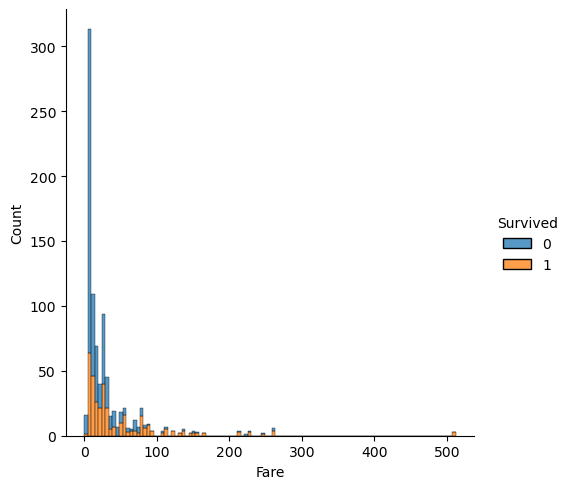

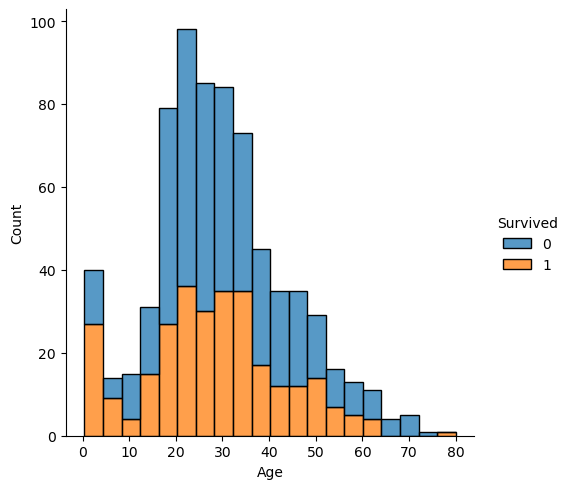

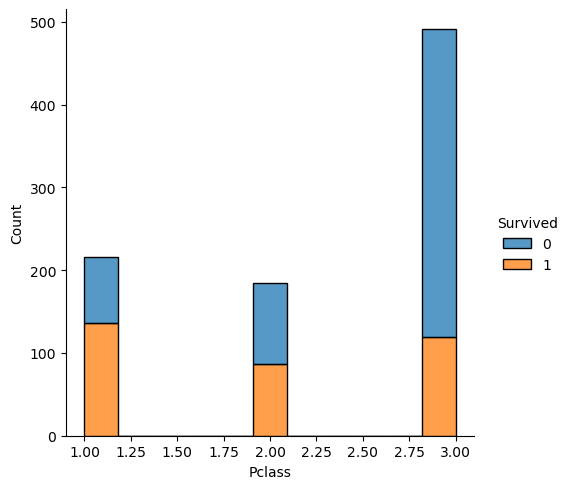

In [48]:
#Plotting the three (3) histograms of the features with the highest correlations with the target variable (i.e. "Survived") according to the "Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient").

    #displot: Is a figure-level function that plots one or more histograms on a grid object. In other words, it can be used to create multiple subplots with different subsets of the data.

    #hue : Semantic variable that is mapped to determine the color of plot elements. In other words, it is like a third element or feature in the histogram.

    #stat : could be {“count”, “frequency”, “probability”, “percent”, "density"} 
        #Aggregate statistic to compute in each bin.

    #multiple: could be {“layer”, “dodge”, “stack”, “fill”}
        #Approach to resolving multiple elements when semantic mapping creates subsets.

sns.displot(training_data, x="Fare", hue="Survived", multiple="stack",stat = "count")
sns.displot(training_data, x="Age", hue="Survived", multiple="stack", stat = "count")
sns.displot(training_data, x="Pclass", hue="Survived", multiple="stack", stat = "count")

# __5. Attribute Combination - Training Dataset__

<span style="color:red">__IMPORTANT: This is an Unfinished Notebook (I am still working on it!)__</span>